In [27]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
import keras.utils as image

#  Model deployment

In [2]:
#Defining paths
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [5]:
#Training model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [6]:
#Getting parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 128)     36992     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 128)    0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 110, 110, 128)     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

# Training data 

In [7]:
#Moulding train images
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [9]:
#Reshaping test and validation images 
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [11]:
#Training the model
hist_new = model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

C:\Users\Suyash gupta\AppData\Local\Temp\ipykernel_13968\72776128.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist_new = model.fit_generator(


Epoch 1/10
6/6 [==============================] - 65s 11s/step - loss: 0.6712 - accuracy: 0.6146 - val_loss: 0.6601 - val_accuracy: 0.8667
Epoch 2/10
6/6 [==============================] - 65s 11s/step - loss: 0.5371 - accuracy: 0.7604 - val_loss: 0.4711 - val_accuracy: 0.8833
Epoch 3/10
6/6 [==============================] - 65s 11s/step - loss: 0.3872 - accuracy: 0.8125 - val_loss: 0.3567 - val_accuracy: 0.9167
Epoch 4/10
6/6 [==============================] - 68s 11s/step - loss: 0.3432 - accuracy: 0.8125 - val_loss: 0.2440 - val_accuracy: 0.9667
Epoch 5/10
6/6 [==============================] - 65s 11s/step - loss: 0.2519 - accuracy: 0.8854 - val_loss: 0.1908 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 66s 11s/step - loss: 0.2585 - accuracy: 0.9167 - val_loss: 0.1152 - val_accuracy: 0.9667
Epoch 7/10
6/6 [==============================] - 68s 11s/step - loss: 0.2435 - accuracy: 0.9219 - val_loss: 0.1896 - val_accuracy: 0.9833
Epoch 8/10
6/6 [===========

In [15]:
#Getting summary
summary=hist_new.history
print(summary)

{'loss': [0.6712319850921631, 0.5370745658874512, 0.38720765709877014, 0.34324410557746887, 0.2518962323665619, 0.25852343440055847, 0.24352240562438965, 0.21533708274364471, 0.18464232981204987, 0.19037948548793793], 'accuracy': [0.6145833134651184, 0.7604166865348816, 0.8125, 0.8125, 0.8854166865348816, 0.9166666865348816, 0.921875, 0.890625, 0.921875, 0.9114583134651184], 'val_loss': [0.6600825190544128, 0.47107791900634766, 0.3566853404045105, 0.24398784339427948, 0.1907644271850586, 0.11519122123718262, 0.1895899921655655, 0.13542790710926056, 0.14528433978557587, 0.0946073830127716], 'val_accuracy': [0.8666666746139526, 0.8833333253860474, 0.9166666865348816, 0.9666666388511658, 0.9666666388511658, 0.9666666388511658, 0.9833333492279053, 0.9666666388511658, 0.9666666388511658, 0.9666666388511658]}


In [16]:
model.save("model_covid.h5")

In [18]:
model.evaluate(train_generator)

7/7 [==============================] - 18s 3s/step - loss: 0.1148 - accuracy: 0.9688


[0.11480860412120819, 0.96875]

In [20]:
print(model.evaluate(validation_generator))

2/2 [==============================] - 5s 2s/step - loss: 0.0946 - accuracy: 0.9667
[0.0946073830127716, 0.9666666388511658]


## Confusion Matrix

In [32]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [22]:
y_actual, y_test = [],[]

In [33]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(pred[0,0])
    y_actual.append(1)
    

1/1 [==============================] - 0s 105ms/step


In [34]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

1/1 [==============================] - 0s 75ms/step


In [35]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

<Axes: >

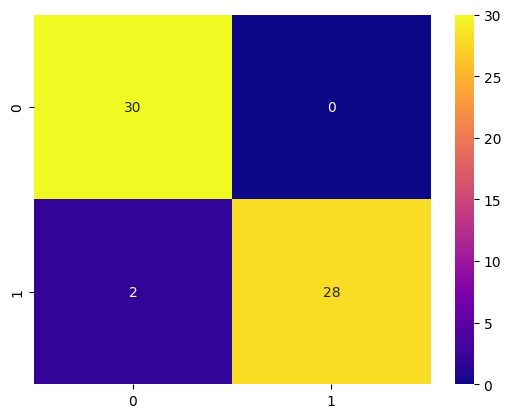

In [37]:
sns.heatmap(cn,cmap="plasma",annot=True) #0: Covid ; 1: Normal

In [52]:
import numpy as np
from PIL import Image
from keras.models import load_model

model=load_model('model_covid.h5')

# Assuming you have the path to your image
#image_path = "CovidDataset/Train/Normal/IM-0619-0001.jpeg"
image_path = "CovidDataset/Train/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg"


# Load and preprocess the image
img = Image.open(image_path)
img = img.convert("RGB")  # Convert to RGB if not already
img = img.resize((224, 224))  # Resize to the desired dimensions
img = np.array(img)
img = img / 255.0  # Normalize the pixel values
img = np.expand_dims(img, axis=0)

# Predict the class of the image
pred_probabilities = model.predict(img)
print("Prediction probabilities:", pred_probabilities)



predicted_class = np.argmax(pred_probabilities)

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 133ms/step
Prediction probabilities: [[0.09434694]]
Predicted class: 0
